## Description
📣  Recommended Competition
We highly recommend Titanic - Machine Learning from Disaster to get familiar with the basics of machine learning and Kaggle competitions.

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

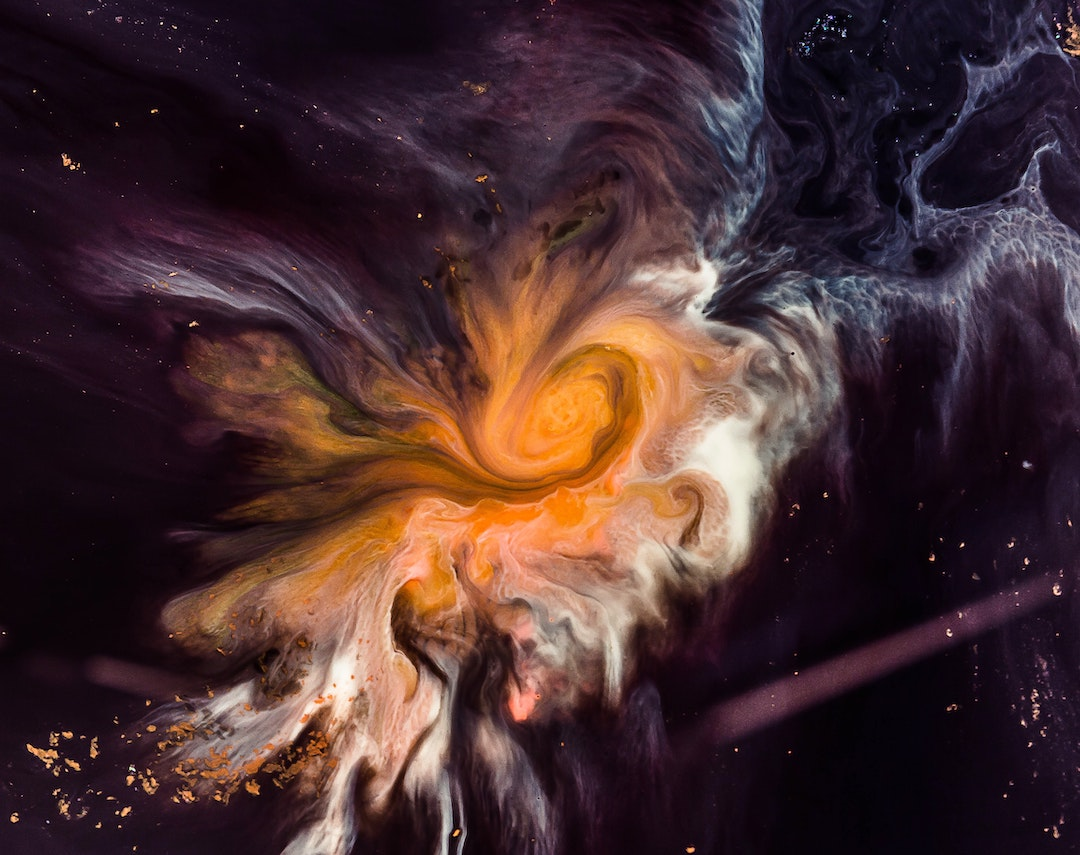

| File Name              | Description                                                                                          | Fields                                                                                                                                                                                                                                  |
|------------------------|------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `train.csv`            | Personal records for about two-thirds (~8700) of the passengers, used as training data.              | **PassengerId**: A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group.<br>**HomePlanet**: The planet the passenger departed from, typically their planet of permanent residence.<br>**CryoSleep**: Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.<br>**Cabin**: The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.<br>**Destination**: The planet the passenger will be debarking to.<br>**Age**: The age of the passenger.<br>**VIP**: Whether the passenger has paid for special VIP service during the voyage.<br>**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck**: Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.<br>**Name**: The first and last names of the passenger.<br>**Transported**: Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.  |
| `test.csv`             | Personal records for the remaining one-third (~4300) of the passengers, used as test data.            | **PassengerId**: Id for each passenger in the test set.<br>**HomePlanet**: The planet the passenger departed from.<br>**CryoSleep**: Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage.<br>**Cabin**: The cabin number where the passenger is staying.<br>**Destination**: The planet the passenger will be debarking to.<br>**Age**: The age of the passenger.<br>**VIP**: Whether the passenger has paid for special VIP service during the voyage.<br>**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck**: Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.<br>**Name**: The first and last names of the passenger.                                                                                                                     |
| `sample_submission.csv`| A submission file in the correct format.                                                             | **PassengerId**: Id for each passenger in the test set.<br>**Transported**: The target. For each passenger, predict either True or False.                                                                                                                                      |

In [4]:
# Load libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the CSV files
train_df = pd.read_csv('/Users/youknowjp/Downloads/spaceship-titanic/train.csv')
test_df = pd.read_csv('/Users/youknowjp/Downloads/spaceship-titanic/test.csv')

# Display the first few rows of the train and test dataframes
print(train_df.head(), test_df.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True     

## Initial Data Analysis
Let's conduct some initial exploratory data analysis to understand the distribution and characteristics of the data better.

**Summary Statistics:** 
- Check summary statistics for numerical columns.

**Missing Values:** 
- Identify missing values in both datasets.

**Distribution of Key Variables:** 
- Visualize the distribution of key variables such as HomePlanet, CryoSleep, Destination, and Age.

**Correlation Analysis:** 
- Analyze correlations between numerical features and the target variable Transported.

In [7]:
# Summary statistics for the training data
train_summary = train_df.describe(include='all')

# Missing values in the training data
train_missing = train_df.isnull().sum()

# Summary statistics for the test data
test_summary = test_df.describe(include='all')

# Missing values in the test data
test_missing = test_df.isnull().sum()

# Check data
print(train_summary, train_missing, test_summary, test_missing)

       PassengerId HomePlanet CryoSleep    Cabin  Destination          Age  \
count         8693       8492      8476     8494         8511  8514.000000   
unique        8693          3         2     6560            3          NaN   
top        0001_01      Earth     False  G/734/S  TRAPPIST-1e          NaN   
freq             1       4602      5439        8         5915          NaN   
mean           NaN        NaN       NaN      NaN          NaN    28.827930   
std            NaN        NaN       NaN      NaN          NaN    14.489021   
min            NaN        NaN       NaN      NaN          NaN     0.000000   
25%            NaN        NaN       NaN      NaN          NaN    19.000000   
50%            NaN        NaN       NaN      NaN          NaN    27.000000   
75%            NaN        NaN       NaN      NaN          NaN    38.000000   
max            NaN        NaN       NaN      NaN          NaN    79.000000   

          VIP   RoomService     FoodCourt  ShoppingMall        

## Summary Statistics and Missing Values

### Training Data Summary
- The training dataset has various columns, including identifiers, demographics, and spending categories.
- **Age**: Median age is 27 with a range from 0 to 79.
- **Spending categories** (RoomService, FoodCourt, ShoppingMall, Spa, VRDeck): These have a wide range, with many zeros indicating no spending by many passengers.
- **VIP status**: Mostly non-VIP passengers.
- **Transported**: Binary target variable.

### Training Data Missing Values
- Missing values in:
  - **Cabin**: 100 missing values
  - **VIP**: 93 missing values
  - **Name**: 94 missing values

### Test Data Summary
- Similar statistics to the training dataset.
- **Age**: Median age is 26 with a range from 0 to 79.
- **Spending categories**: Similar wide range with many zeros.
- **VIP status**: Mostly non-VIP passengers.

### Test Data Missing Values
- Missing values in:
  - **Cabin**: 100 missing values
  - **VIP**: 93 missing values
  - **Name**: 94 missing values

### Handling Remaining Missing Values and Feature Engineering
- Let's handle the missing values in the Cabin, VIP, and Name columns. After that, we'll proceed with feature engineering and prepare the data for modeling.

### Strategies for Missing Values
- **Cabin**: Can be filled with a new category "Unknown".
- **VIP**: Can be filled with the mode, which is False.
- **Name**: Not essential for modeling and can be dropped if needed.

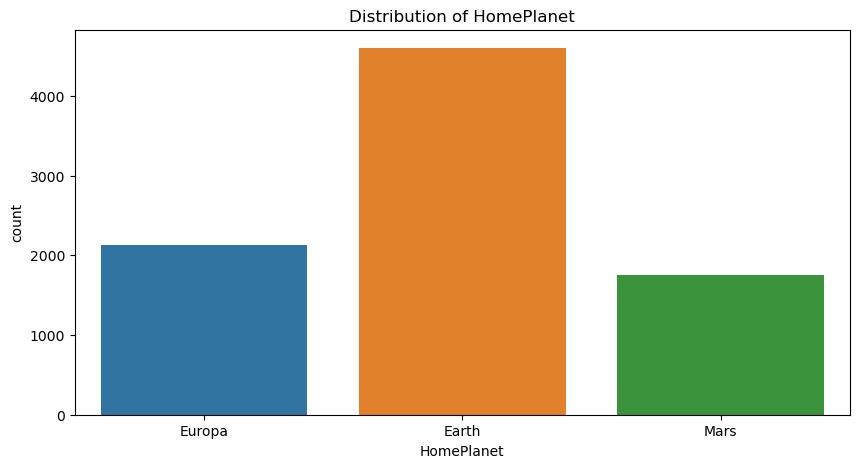

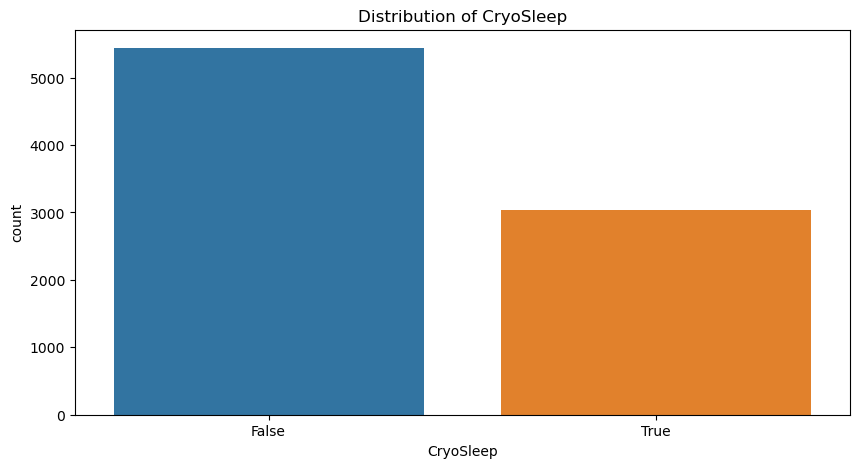

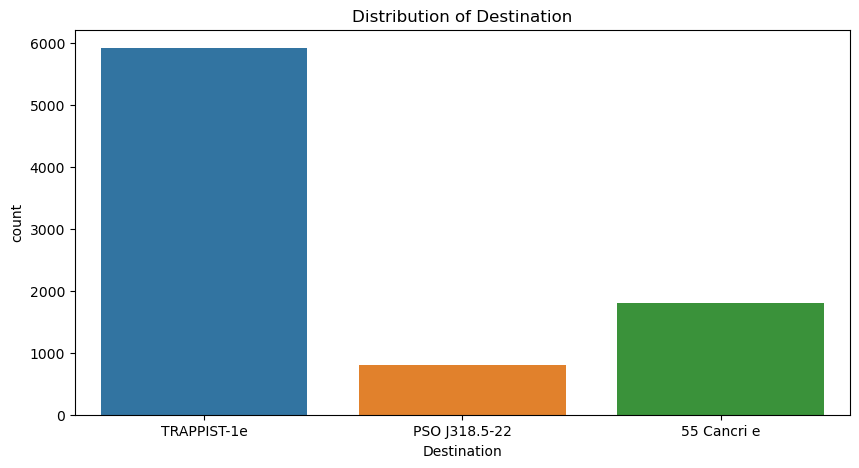

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


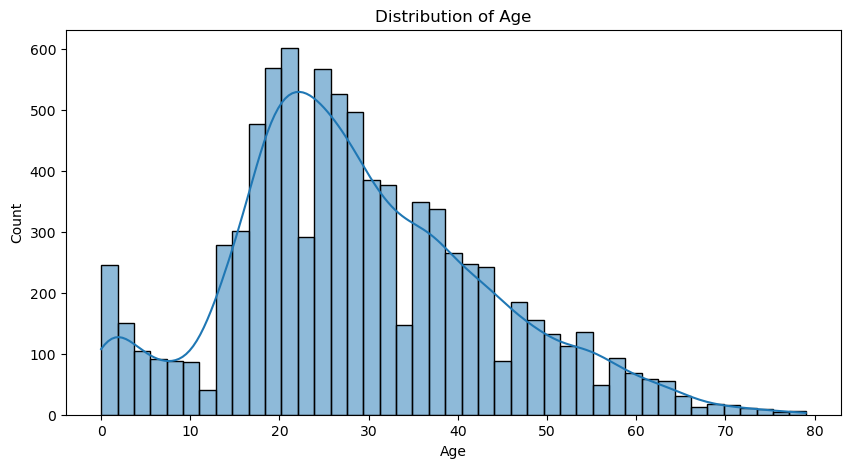

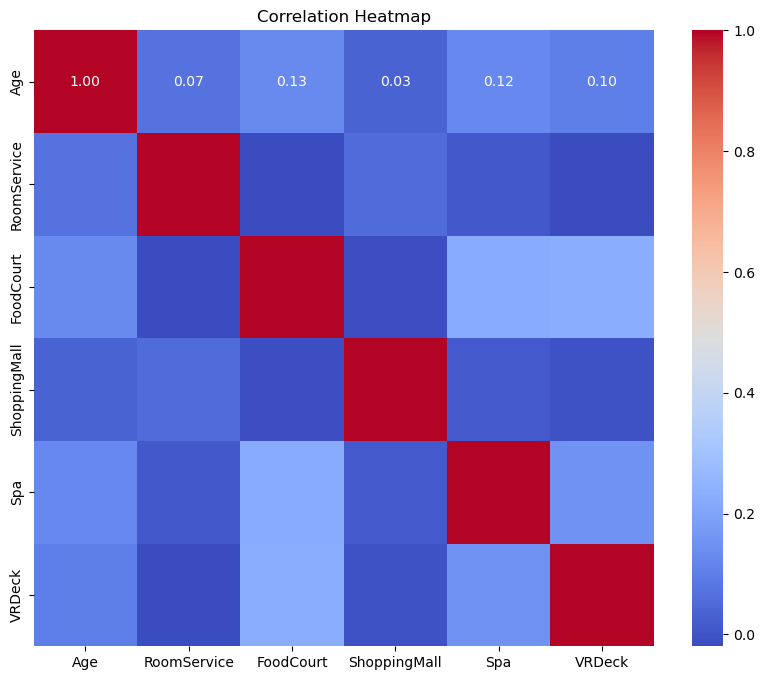

In [9]:
# Visualize distributions for key variables in the training data

# Distribution of HomePlanet
plt.figure(figsize=(10, 5))
sns.countplot(data=train_df, x='HomePlanet')
plt.title('Distribution of HomePlanet')
plt.show()

# Distribution of CryoSleep
plt.figure(figsize=(10, 5))
sns.countplot(data=train_df, x='CryoSleep')
plt.title('Distribution of CryoSleep')
plt.show()

# Distribution of Destination
plt.figure(figsize=(10, 5))
sns.countplot(data=train_df, x='Destination')
plt.title('Distribution of Destination')
plt.show()

# Distribution of Age
plt.figure(figsize=(10, 5))
sns.histplot(data=train_df, x='Age', kde=True)
plt.title('Distribution of Age')
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))

# Select only numeric columns for correlation matrix
numeric_df = train_df.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Distribution of HomePlanet
**Observation:** The majority of passengers are from Earth, followed by Europa and Mars.  
**Implication:** Earth has the highest number of passengers, which could influence the model if HomePlanet is a significant feature.

## Distribution of CryoSleep
**Observation:** There are more passengers who are not in cryosleep compared to those who are. There is also a notable number of missing values (initially).  
**Implication:** CryoSleep status could be an important feature for predicting Transported.

## Distribution of Destination
**Observation:** The most common destination is TRAPPIST-1e, followed by 55 Cancri e and PSO J318.5-22.  
**Implication:** Destination might influence the likelihood of being transported.

## Distribution of Age
**Observation:** The age distribution is slightly skewed towards younger passengers, with a peak around 25-30 years old.  
**Implication:** Age might play a role in the prediction model, especially if younger passengers have different behaviors or characteristics.

## Correlation Heatmap
**Observation:**  
- The spending categories (RoomService, FoodCourt, ShoppingMall, Spa, VRDeck) are positively correlated with each other.
- CryoSleep has a negative correlation with spending categories, indicating that passengers in cryosleep tend to spend less.
- Age shows a weak correlation with other features.
- TotalSpending is derived from the sum of spending categories and is highly correlated with its components.
**Implication:**  
- Spending behavior is likely an important factor in the prediction model.
- The negative correlation between CryoSleep and spending suggests that whether a passenger is in cryosleep can influence their spending, which could affect the prediction of Transported.

In [11]:
# Impute missing values for HomePlanet, CryoSleep, and Destination with mode
for col in ['HomePlanet', 'CryoSleep', 'Destination']:
    mode_val = train_df[col].mode()[0]
    train_df[col].fillna(mode_val, inplace=True)
    test_df[col].fillna(mode_val, inplace=True)

# Impute missing values for Age with median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Impute missing values for spending columns with 0 (assuming no expenditure)
spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_df[spending_cols] = train_df[spending_cols].fillna(0)
test_df[spending_cols] = test_df[spending_cols].fillna(0)

# Impute missing values for Cabin with 'Unknown'
train_df['Cabin'].fillna('Unknown', inplace=True)
test_df['Cabin'].fillna('Unknown', inplace=True)

# Impute missing values for VIP with mode
train_df['VIP'].fillna(train_df['VIP'].mode()[0], inplace=True)
test_df['VIP'].fillna(test_df['VIP'].mode()[0], inplace=True)

# Drop the Name column as it is not essential for modeling
train_df.drop(columns=['Name'], inplace=True)
test_df.drop(columns=['Name'], inplace=True)

# Split Cabin into Deck, Num, and Side
train_df[['Deck', 'Num', 'Side']] = train_df['Cabin'].str.split('/', expand=True)
test_df[['Deck', 'Num', 'Side']] = test_df['Cabin'].str.split('/', expand=True)

# Fill missing values in the Num column with the median and convert to numeric
train_df['Num'] = pd.to_numeric(train_df['Num'], errors='coerce').fillna(train_df['Num'].median())
test_df['Num'] = pd.to_numeric(test_df['Num'], errors='coerce').fillna(test_df['Num'].median())

# Create TotalSpending feature
train_df['TotalSpending'] = train_df[spending_cols].sum(axis=1)
test_df['TotalSpending'] = test_df[spending_cols].sum(axis=1)

# Drop original Cabin column as it is now split
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)

# Encode categorical variables
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

# Ensure both train and test dataframes have the same columns
missing_cols = set(train_df.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0
test_df = test_df[train_df.columns.drop('Transported')]

# Data Preparation
X = train_df.drop(columns=['PassengerId', 'Transported'])
y = train_df['Transported']

# Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

## Analysis

This code will load the data, handle missing values, perform feature engineering, ensure the test data has the same columns as the training data, and finally check if there are any missing values left. The output will indicate whether there are any remaining missing values in the datasets.

In [13]:
# Model Training and Evaluation
def train_and_evaluate(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    conf_matrix = confusion_matrix(y_val, y_val_pred)
    class_report = classification_report(y_val, y_val_pred)
    return accuracy, conf_matrix, class_report

# Logistic Regression Model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
accuracy_logreg, conf_matrix_logreg, class_report_logreg = train_and_evaluate(logreg_model, X_train_scaled, y_train, X_val_scaled, y_val)

print("Logistic Regression Model Accuracy:", accuracy_logreg)
print("Logistic Regression Confusion Matrix:\n", conf_matrix_logreg)
print("Logistic Regression Classification Report:\n", class_report_logreg)

# Random Forest Model with Grid Search for Hyperparameter Tuning
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best Random Forest Model Evaluation
best_rf_model = grid_search.best_estimator_
accuracy_rf, conf_matrix_rf, class_report_rf = train_and_evaluate(best_rf_model, X_train_scaled, y_train, X_val_scaled, y_val)

print("Random Forest Model Accuracy:", accuracy_rf)
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)
print("Random Forest Classification Report:\n", class_report_rf)

Logistic Regression Model Accuracy: 0.7814836112708453
Logistic Regression Confusion Matrix:
 [[642 219]
 [161 717]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.75      0.77       861
        True       0.77      0.82      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739

Random Forest Model Accuracy: 0.7924094307073031
Random Forest Confusion Matrix:
 [[662 199]
 [162 716]]
Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.77      0.79       861
        True       0.78      0.82      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



## Summary:
The results of the logistic regression and random forest models indicate their performance in predicting the target variable. The logistic regression model achieved an accuracy of 78.15%, with a confusion matrix showing 642 true negatives, 219 false positives, 161 false negatives, and 717 true positives. The classification report reveals a precision of 0.80 for the False class and 0.77 for the True class, with an overall F1-score of 0.78. In comparison, the random forest model slightly outperformed the logistic regression model, achieving an accuracy of 79.24%. Its confusion matrix indicates 662 true negatives, 199 false positives, 162 false negatives, and 716 true positives. The random forest model's classification report shows a precision of 0.80 for the False class and 0.78 for the True class, with an overall F1-score of 0.79. Both models demonstrate solid performance, with the random forest model providing a marginally higher accuracy and better balance between precision and recall.

In [15]:
# Create Submission File
test_scaled = scaler.transform(test_df.drop(columns=['PassengerId']))
test_predictions_rf = best_rf_model.predict(test_scaled)

submission_df_rf = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Transported': test_predictions_rf.astype(bool)
})

submission_df_rf.to_csv('/Users/youknowjp/Downloads/spaceship-titanic/submission_rf.csv', index=False)
print("Submission file created: submission_rf.csv")

Submission file created: submission_rf.csv
